# Лабораторная №1

## Задание
  1) Сгенерировать выборки для разных распределений и посчитать доверительные интервалы для них. Распределения: нормальное, бернулли, пуассона, экспоненциальное. Сделать с группировкой и без.
  2) Построить ядерную оценку для `N(3, 5)` с прямоугольным и гауссовским ядром (за h принять $h_{opt}$). То же самое сделать для `uniform[3, 5]`

In [291]:
import matplotlib.pyplot as plt
import numpy as np

# Решение
## Часть 1. Генерация выборок и доверительные интервалы

Сгенерировать выборки для разных распределений и посчитать доверительные интервалы для них. Распределения: нормальное, бернулли, пуассона, экспоненциальное.

In [17]:
from scipy.stats import bernoulli, poisson, norm, expon
from scipy.stats import t, chi2
from numpy import sqrt

In [18]:
alpha = 0.05

### Нормальное распределени

Без группирования

Выборку генерировать размера $n = 200$

In [345]:
mean = 0
std_dev = 1
n = 200
normal_sample = norm.rvs(loc=mean, scale=std_dev, size=n)

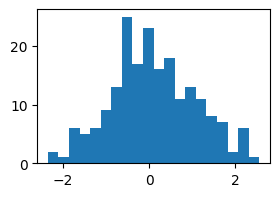

In [346]:
plt.figure(figsize=(3, 2))
plt.hist(normal_sample, bins=20)
plt.show()

#### Доверительный интервал для M

In [347]:
sample_std  = normal_sample.std()
sample_M = normal_sample.mean()

In [348]:
t_quantile = t.ppf(1 - alpha / 2, n - 1)

In [349]:
left_M =  sample_M - t_quantile  * sample_std / sqrt(n)
right_M =  sample_M + t_quantile * sample_std / sqrt(n)

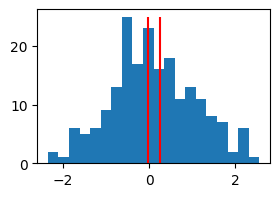

P(-0.032 <= M <= 0.242) = 0.95


In [350]:
plt.figure(figsize=(3, 2))
hist_values = plt.hist(normal_sample, bins=20)[0]
plt.vlines([left_M, right_M], ymin=0, ymax=max(hist_values), colors='red')
plt.show()

print("P({:.3f} <= M <= {:.3f}) = {}".format(left_M, right_M, 1 -alpha))

#### Доверительный интервал для $\sigma^2$

Рассчитываем критические значения хи-квадрат для нижней и верхней границ доверительного интервала

In [351]:
lower_chi_square = chi2.ppf(1 - alpha / 2, n - 1)
upper_chi_square = chi2.ppf(alpha / 2, n - 1)

Рассчитываем интервал

In [352]:
lower_limit = ((n - 1) / lower_chi_square) * sample_std**2
upper_limit = ((n - 1) / upper_chi_square) * sample_std**2

In [353]:
print("P({:.3f} <= sigma^2 <= {:.3f}) = {}".format(lower_limit, upper_limit, 1 -alpha))

P(0.800 <= sigma^2 <= 1.186) = 0.95


#### С группировкой
За k принять $k = [log_2200] + 1 \approx 8$

In [354]:
k = 8


In [355]:

def group(sample, k = 8):
    sample_max = int(sample.max())+1
    sample_min = int(sample.min())-1
    width = sample_max - sample_min
    window = width/k
    groped_sample = []
    intervals = []
    for i in range(k):
        counter = 0
        for elem in sample:
            if elem >= sample_min + window*i and elem < sample_min + window*(i+1):
                counter += 1
        intervals.append([sample_min + window*i, sample_min + window*(i+1)])
        groped_sample.append(counter)
    return groped_sample, intervals

In [356]:
amounts, intervals = group(normal_sample)

In [357]:
def dispersion(intervals, amounts):
    N = sum(amounts)
    result = 0.0
    avg = average(intervals, amounts)
    for i in range(len(amounts)):
        dz = (intervals[i][0]+intervals[i][1])/2
        result += (dz-avg)*(dz-avg) * amounts[i] / N
    return result

In [358]:
def average(intervals, amounts):
    N = sum(amounts)
    result = 0.0
    for i in range(len(amounts)):
        dz = (intervals[i][0]+intervals[i][1])/2
        result += dz * amounts[i] / N
    return result

In [359]:
grouped_std  = sqrt(dispersion(intervals, amounts))
grouped_M = average(intervals, amounts)

In [360]:
t_quantile = t.ppf(1 - alpha / 2, k - 1)

In [361]:
left_M =  grouped_M - t_quantile  * grouped_std / sqrt(k)
right_M =  grouped_M + t_quantile * grouped_std / sqrt(k)

In [362]:
print("P({:.3f} <= M <= {:.3f}) = {}".format(left_M, right_M, 1 -alpha))

P(-0.706 <= M <= 0.954) = 0.95


Доверительный интервал для сигма квадрат

In [363]:
lower_chi_square = chi2.ppf(1 - alpha / 2, k - 1)
upper_chi_square = chi2.ppf(alpha / 2, k - 1)

In [364]:
lower_limit = ((k - 1) / lower_chi_square) * grouped_std**2
upper_limit = ((k - 1) / upper_chi_square) * grouped_std**2

In [365]:
print("P({:.3f} <= sigma^2 <= {:.3f}) = {}".format(lower_limit, upper_limit, 1 -alpha))

P(0.431 <= sigma^2 <= 4.084) = 0.95


### Распределение Бернулли

In [28]:
p_param = 0.3
n = 200
bernoulli_sample = bernoulli.rvs(p=p_param, size=n)

In [29]:
def get_bernoulli_intervals(n, m, alpha):
    mu = norm.ppf(1-alpha/2)
    lower_limit = m/n - mu * sqrt(m * (1 - m/n) )/ n
    upper_limit = m/n + mu * sqrt(m * (1 - m/n) )/ n
    return lower_limit, upper_limit

In [30]:
m = 0.3*200
lower_limit, upper_limit = get_bernoulli_intervals(n, m, alpha)
print("P({:.3f} <= P <= {:.3f}) = {}".format(lower_limit, upper_limit, 1 -alpha))

P(0.236 <= P <= 0.364) = 0.95


Определение доверительного интервала для распределения Бернулли при малых размерах выборки

In [31]:
p_param = 0.3
n = 50
m = 0.3*n
bernoulli_sample = bernoulli.rvs(p=p_param, size=n)

In [32]:
def get_bernoulli_intervals_for_small_samples(n, m, alpha):
    mu = norm.ppf(1-alpha/2)
    lower_limit = 1/(1+(mu**2)/n) * (m/n + mu**2 / (2*n) - mu * sqrt(m/n**2 * (1-m/n) + mu**2 / (4*n**2)))
    upper_limit = 1/(1+(mu**2)/n) * (m/n + mu**2 / (2*n) + mu * sqrt(m/n**2 * (1-m/n) + mu**2 / (4*n**2)))
    return lower_limit, upper_limit

In [33]:
lower_limit, upper_limit = get_bernoulli_intervals_for_small_samples(n, m, alpha)
print("P({:.3f} <= P <= {:.3f}) = {}".format(lower_limit, upper_limit, 1 -alpha))

P(0.191 <= P <= 0.438) = 0.95


### Распределение Пуассона

In [34]:
theta = 3
n = 200
poisson_sample = poisson.rvs(mu=theta, size=n)

Доверительный интервал для $\theta$

$\theta$ одновременно равняется мат. ожиданию и дисперсии

In [35]:
sample_M = poisson_sample.mean()
mu = norm.ppf(1 - alpha / 2)

lower_limit =  sample_M - mu * sqrt(sample_M / n)
upper_limit =  sample_M + mu * sqrt(sample_M / n)

print("P({:.3f} <= M <= {:.3f}) = {}".format(lower_limit, upper_limit, 1 -alpha))

P(2.693 <= M <= 3.167) = 0.95


### Экспоненциальное распределени

In [92]:
lambda_param = 2
n = 200
exponential_sample = expon.rvs(scale=lambda_param, size=n)

Доверительный интервал для параметра $\lambda$

In [93]:
sample_M = exponential_sample.mean()
mu = norm.ppf(alpha / 2)

lower_limit =  1/sample_M - mu/sqrt(n*sample_M)
upper_limit =  1/sample_M + mu/sqrt(n*sample_M)

print("P({:.3f} <= lambda <= {:.3f}) = {}".format(1/lower_limit, 1/upper_limit, 1 -alpha))

P(1.743 <= lambda <= 2.618) = 0.95


## Часть 2. Ядерные оценки

Построить ядерную оценку для `N(3, 5)` с прямоугольным и гауссовским ядром (за h принять $h_{opt}$). То же самое сделать для `uniform[3, 5]`

In [94]:
from numpy import exp, pi

In [95]:
def fixed_variance(sample, n):
    sample_variance = sample.var()
    return n/(n-1)*sample_variance

In [96]:
def gaussian_kernel(x):
    return exp(-x**2 / 2) / sqrt(2*pi)

In [97]:
def uniform_kernel(x):
    return (abs(x) <= 1)*0.5

`f_hat` - ядерный оценщик плотности

In [98]:
def f_hat(sample, h, x, kernel):
    result = 0
    for element in sample:
        result += kernel((x - element) / h)
    result /= len(sample)*h
    return result

In [99]:
def f_hat_gaussian(sample, h, x):
    return f_hat(sample, h, x, gaussian_kernel)

In [100]:
def f_hat_uniform(sample, h, x):
    return f_hat(sample, h, x, uniform_kernel)

In [221]:
def plot_hist_from_sample(sample, bins = 10, label = None, width=1.4):
    hist, bin_edges = np.histogram(sample, bins=bins)
    hist = hist/len(sample)
    for i in range(len(hist)):
        hist[i] = hist[i]/(bin_edges[i+1] - bin_edges[i])
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
    plt.bar(bin_centers, hist, width=width,label=label)

## Нормальное распределение

In [295]:
mean = 3
std_dev = 5
n = 500
normal_sample = norm.rvs(loc=mean, scale=std_dev, size=n)

In [296]:
normal_sample

array([ 8.14700817e+00, -3.53083466e-01,  8.16655917e+00,  2.32686096e+00,
        5.95343464e+00,  4.54664307e+00,  2.99141326e+00,  1.08796501e+01,
        1.94558309e-01, -5.75299346e+00,  1.51550182e+00,  4.10527929e-01,
        2.38654414e+00, -3.72153293e-01, -6.36180683e+00,  2.51282211e+00,
        8.66355060e+00,  2.73722872e+00,  9.07481586e+00,  3.95964779e+00,
       -5.11446545e+00, -5.38041644e+00,  5.65036608e+00,  1.30007691e+01,
        5.87771576e+00,  6.83121596e-02,  4.34020804e+00,  1.14299283e+00,
        2.46113453e+00,  6.94953662e+00,  1.59947478e+00,  2.91160847e+00,
        2.35772549e+00,  1.64775007e+00,  1.14114971e+01,  4.62942759e+00,
        3.49798842e+00,  3.70719898e+00,  1.12373610e+01,  6.19049568e+00,
       -2.03424840e+00,  2.93320109e+00, -9.99417960e-01,  5.35205322e+00,
        8.70366607e+00, -4.10893584e-01,  9.28550515e-01,  7.47855651e+00,
        5.09333145e+00,  2.19729194e+01,  4.14834588e+00, -1.33184108e+00,
        1.88967390e+00,  

In [243]:
sample_fixed_variance = fixed_variance(normal_sample, n)
h_opt = 1.05 * sqrt(sample_fixed_variance) / n**(1/5)

In [244]:
from numpy import linspace

In [245]:
x_linspace = linspace(-20, 20, 100)

In [246]:
normal_with_uniform_kernel = f_hat_uniform(normal_sample, h_opt, x_linspace)
normal_with_gaussian_kernel = f_hat_gaussian(normal_sample, h_opt, x_linspace)

[]

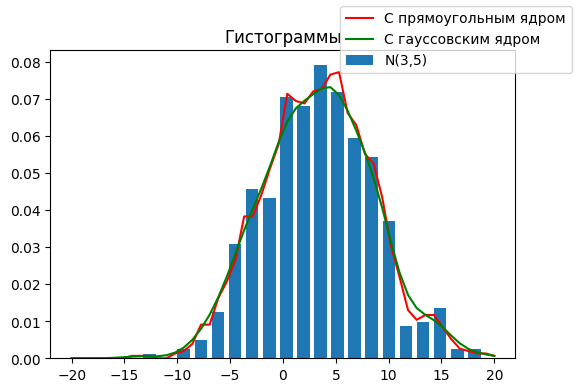

In [247]:
fig = plt.figure(figsize=(6,4))
plt.title('Гистограммы')
plot_hist_from_sample(normal_sample, 20, label='N(3,5)', width=1.2)
plt.plot(x_linspace, normal_with_uniform_kernel, 'r', label='С прямоугольным ядром')
plt.plot(x_linspace, normal_with_gaussian_kernel, 'g', label='С гауссовским ядром')
fig.legend()
plt.plot()

In [248]:
normal_with_gaussian_kernel[len(normal_with_gaussian_kernel)//2]

0.06387765328522942

## Равномерное распределение

In [249]:
from scipy.stats import uniform

In [250]:
n = 500
min_value= 3
width = 2
uniform_sample = uniform.rvs(loc=min_value, scale=width, size=n)

In [251]:
sample_fixed_variance = fixed_variance(uniform_sample, n)
h_opt = 1.05 * sample_fixed_variance / n**(1/5)

In [252]:
from numpy import linspace

In [292]:
x_linspace = linspace(-5, 7, 100)

In [293]:
uniform_with_uniform_kernel = f_hat_uniform(uniform_sample, h_opt, x_linspace)
uniform_with_gaussian_kernel = f_hat_gaussian(uniform_sample, h_opt, x_linspace)

[]

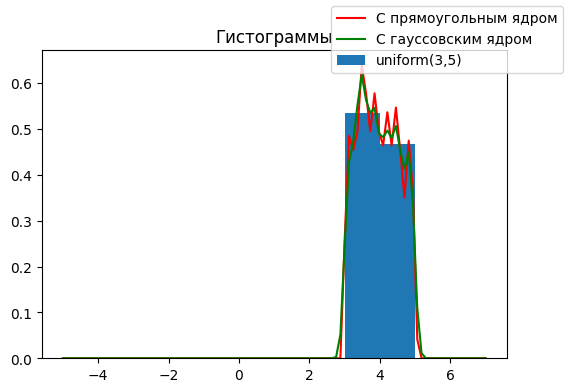

In [294]:
fig = plt.figure(figsize=(6,4))
plt.title('Гистограммы')
plot_hist_from_sample(uniform_sample, 2, label='uniform(3,5)', width=1)
plt.plot(x_linspace, uniform_with_uniform_kernel, 'r', label='С прямоугольным ядром')
plt.plot(x_linspace, uniform_with_gaussian_kernel, 'g', label='С гауссовским ядром')
fig.legend()
plt.plot()